### Practice Notebook

Super Deadly dont touch

By Manu Patil

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def make_system(Gamma, mu, tau, beta, rho, alpha, sigma, delta, pi,dt):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(R = 200, L = 0, E = 0, V = 100);

    t0 = 0
    t_end = 300
    
    return System(init=init, t0=t0, t_end=t_end,Gamma = Gamma, 
                  mu = mu, 
                  tau = tau, 
                  beta = beta, 
                  rho = rho, 
                  alpha = alpha, 
                  sigma = sigma, 
                  delta = delta, 
                  pi = pi, dt=dt)

In [3]:
def update_func(state, t, system):
    """Update the RLEV model.
    
    state: State (R, L, E, V)
    t: time
    system: System object
    
    returns: State (RLEV)
    """
    unpack(system)
    r,l,e,v = state;
    dr = ((Gamma * tau - mu * r - beta * r * v)*dt)
    dl = ((rho * beta * r * v- mu * l - alpha * l)*dt)
    de = (((1 - rho)*beta*r*v + alpha*l - delta*e)*dt)
    dv = ((pi*e - sigma *v)*dt)
    r += dr
    l += dl
    e += de
    v += dv   

    return State(R = r,L = l,E = e,V = v);

In [4]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

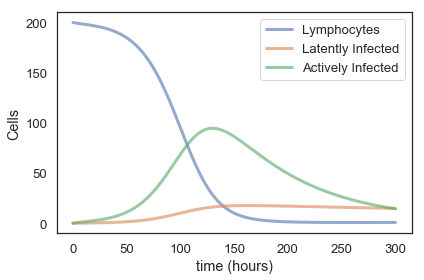

In [5]:
system = make_system(1.36, .00136, .2, .00027, .1, .036 , 2, .33, 100,1/24) #Given Parameters and dt set to 1/24 such that time is represented in hours
frame = run_simulation(system, update_func);
plot(frame.R, label  = "Lymphocytes");
plot(frame.L, label = "Latently Infected");
plot(frame.E, label = "Actively Infected");

decorate(xlabel = "time (hours)", ylabel = "Cells");


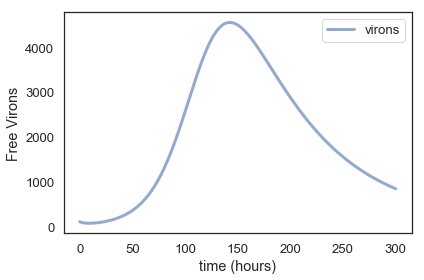

In [6]:
plot(frame.V, label = "virons");
decorate(xlabel = "time (hours)", ylabel = "Free Virons");

In [7]:
# system = make_system(1.36, .00136, .2, .00027, .1, .036 , 2, .33, 100,1/24)
# frame = run_simulation(system, update_func);
# #print(frame)
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# ax1.set_yscale('log')
# ax1.plot(frame.V, 'r')
# ax1.set_ylabel("R(r)")
# ax1.set_xlabel("time (hours)")
# decorate();

# """
# ax2 = ax1.twinx()
# ax2.set_yscale('linear')
# ax2.plot(frame.L, 'g')
# ax2.plot(frame.E, 'b')
# ax2.set_ylabel('L (g), E (b)')
# decorate();
# """

In [8]:
def slope_func(state, t, system):
    """Return slope of each of the state variables
    
    state: State (R, L, E, V)
    t: time
    system: System object
    
    returns: dr,dl,de,dv
    """
    unpack(system);
    r,l,e,v = state;
    dr = ((Gamma * tau - mu * r - beta * r * v))
    dl = ((rho * beta * r * v- mu * l - alpha * l))
    de = (((1 - rho)*beta*r*v + alpha*l - delta*e))
    dv =(pi*e - sigma *v)
  

    return dr, dl,de,dv;

In [9]:
slope_func(init, 0, system)

(-5.4, 0.54, 4.859999999999999, -200)

In [10]:
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,1592
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


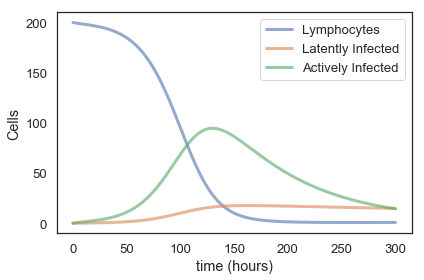

In [11]:
plot(frame.R, label  = "Lymphocytes");
plot(frame.L, label = "Latently Infected");
plot(frame.E, label = "Actively Infected");

decorate(xlabel = "time (hours)", ylabel = "Cells");

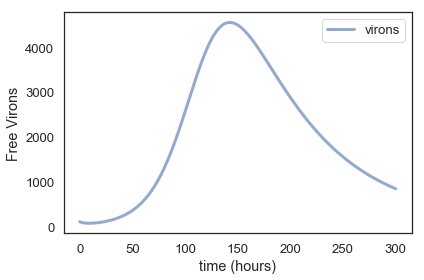

In [16]:
plot(frame.V, label = "virons", );
decorate(xlabel = "time (hours)", ylabel = "Free Virons");